In [35]:
import pandas as pd 
import numpy as np
import openmatrix as omx

In [36]:
def read_skims(path, mode='a'):
    """
    Opens skims OMX file. 
    Parameters:
    ------------
    mode : string
        'r' for read-only; 
        'w' to write (erases existing file); 
        'a' to read/write an existing file (will create it if doesn't exist).
        Ignored in read-only mode.  
    """
    skims = omx.open_file(path, mode = mode)
    return skims

In [166]:
# MTC skims
mtc_path = 'skims/mtc_skims.omx'
mtc_skims = read_skims(mtc_path, mode='r')

# Beam Skims
beam_path = 'skims/beam_skims.omx'
beam_skims = read_skims(beam_path, mode='r')

Average Waiting Time Difference: -11.696301175722203


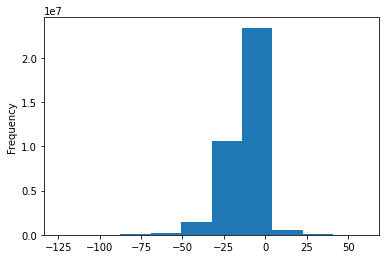

In [167]:
# Select IWAIT times. IWAIT = Initial wait time, time (minutes x 100)
matrix_names = pd.Series(mtc_skims.list_matrices())
waiting_times = matrix_names[matrix_names.str.contains('IWAIT')]

# Compare each wait time matrix MTC vs BEAM
diff_list = []
for matrix in waiting_times:
    try: 
        m1 = np.array(mtc_skims[matrix])[:1454,:1454]/100
        m2 = np.array(beam_skims[matrix])/100
        diff = (m2 - m1).flatten()
        diff_list.append(diff)
    except KeyError:
        pass
    
# Concatenate Results in single Pandas Series
diffs = pd.Series(np.concatenate(diff_list))

# Filter out difference that are zeros
d1 = diffs[diffs != 0]

#Statistics 
avg_diff = d1.mean()
print (f"Average Waiting Time Difference: {avg_diff}")

#Plots
d1.plot.hist();

**Conclusion** 

- BEAM transit waiting times are, on average, 11 mins off MTC waiting times. It can be true that modifying the frequency might be underestimating the true behaviour of waiting times. 